<a href="https://colab.research.google.com/github/Yofandra/PCVK_Ganjil_2023/blob/main/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Praktikum No.1

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


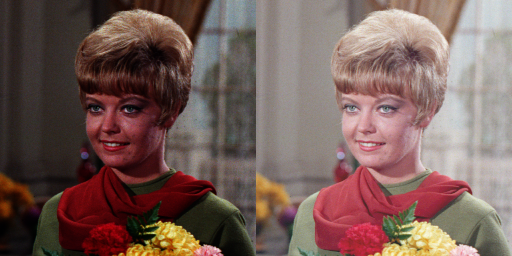

In [33]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)

img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
gammaImg = gammaCorrection(img, gamma)

final_frame = cv.hconcat((img, gammaImg))
cv2_imshow(final_frame)

Praktikum No.2

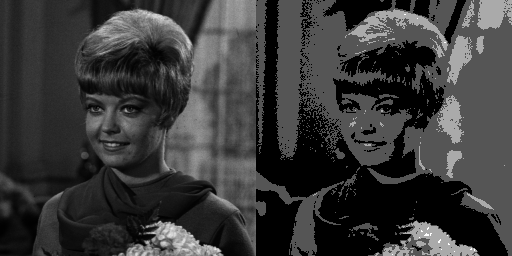

In [32]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
       depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

Praktikum No.3

Nilai PSNR adalah 19.516805115880597 (dB)
Jumlah Citra : 5


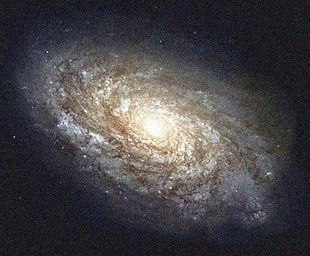

Nilai PSNR adalah 19.727114147953024 (dB)
Jumlah Citra : 10


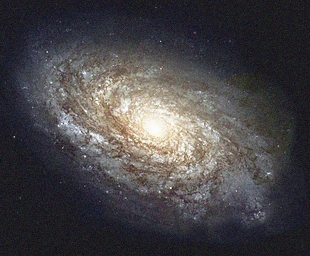

Nilai PSNR adalah 19.838254781043172 (dB)
Jumlah Citra : 20


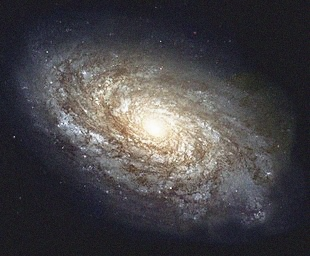

Nilai PSNR adalah 19.888186364657702 (dB)
Jumlah Citra : 40


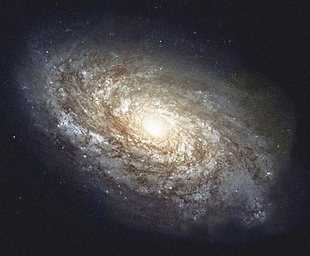

Nilai PSNR adalah 19.918241913938537 (dB)
Jumlah Citra : 80


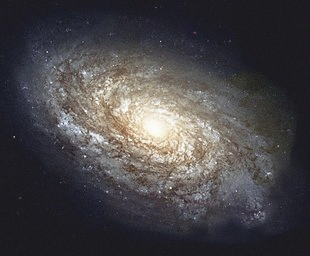

Nilai PSNR adalah 19.92196095594035 (dB)
Jumlah Citra : 100


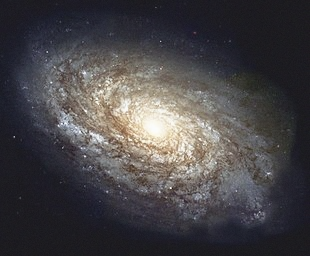

In [58]:
import cv2
import numpy as np
from math import log10, sqrt
import glob

def PSNR(original, img2):
    mse = np.mean((original - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/noises/*.jpg'):
    n = cv2.imread(img)
    cv_img.append(n)

def denoise_image(n):
  denoised_image = np.zeros(cv_img[0].shape)
  for i in range(n):
    denoised_image = denoised_image+cv_img[i]

  denoised_image = np.uint16(denoised_image/n)
  psnr= PSNR(original, denoised_image)
  print('Nilai PSNR adalah', psnr, '(dB)')
  print('Jumlah Citra :', n)
  cv2_imshow(denoised_image)

jumlah = [5,10,20,40,80,100]
for i in jumlah:
  denoise_image(i)

Kesimpulan : Semakin banyak jumlah citra, maka nilai PNSR semakin bertambah

Praktikum No.4

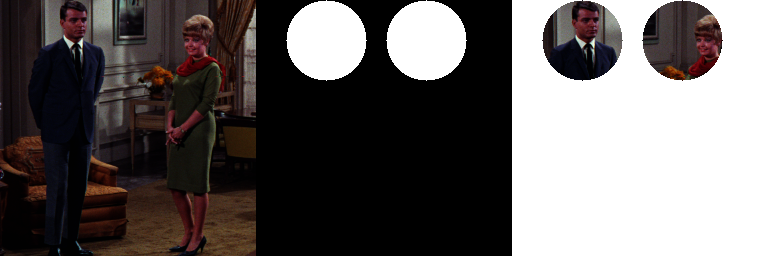

In [74]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (170, 40), 40, (255,255,255), -1)

result = img & mask & mask2
#fungsi dari opencv berikut dapat digunakan
#result = cv.bitwise_and(image, mask)
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

Praktikum No.5

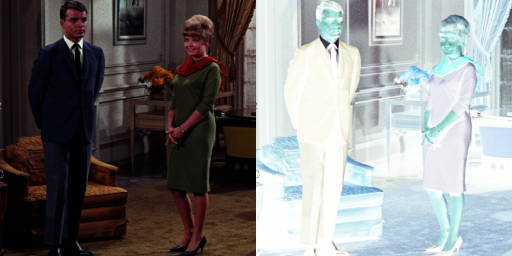

In [84]:
# NOT
result = cv.bitwise_not(img, result)

final_frame = cv.hconcat((img, result))
cv2_imshow(final_frame)

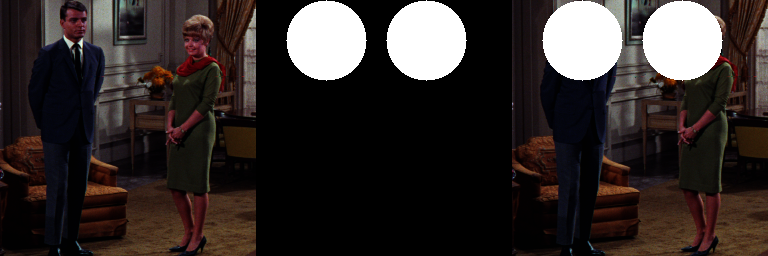

In [85]:
# OR
result = img | mask | mask2

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

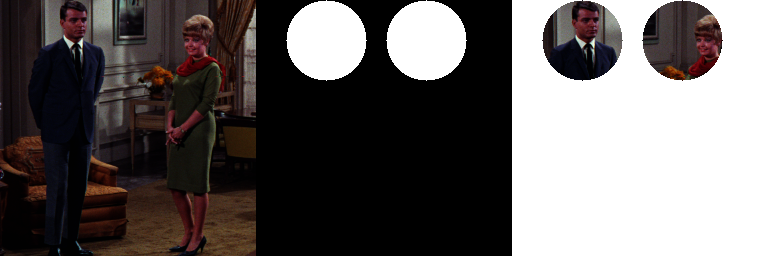

In [86]:
# AND
result = img & mask & mask2
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

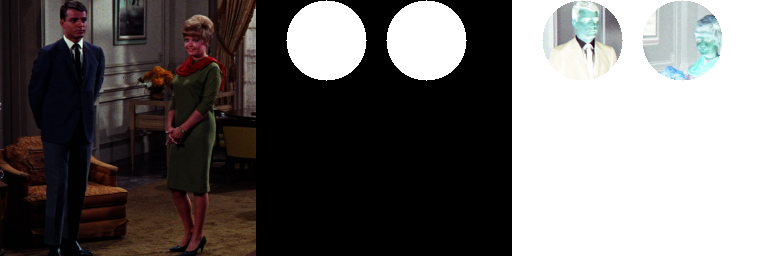

In [88]:
# NAND
result = cv.bitwise_not(cv.bitwise_and(img, mask))

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

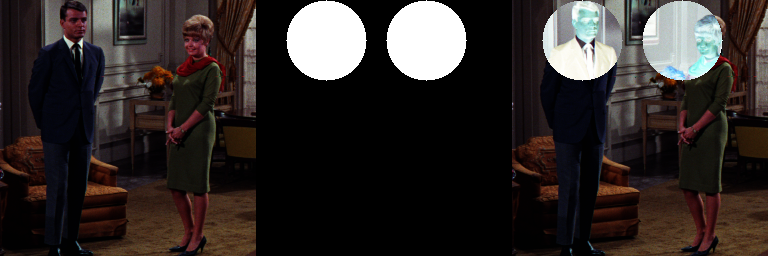

In [90]:
# XOR
result = cv.bitwise_xor(img, mask, result)

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

Analisa :
- Pada Operasi NOT menampilkan gambar menjadi negatif
- Pada Operasi OR menampilkan gambar asli tetap dan mask menjadi putih
- Pada Operasi AND menampilkan gambar asli menjadi putih tetapi mask nya normal
- Pada Operasi NAND menampilkan gambar asli menjadi warna putih dan mask menjadi negatif
- Pada Operasi XOR menampilkan gambar asli tetap tetapi mask menjadi negatif